Run A2C model learning


In [ ]:
import numpy as np
from utils.model import create_env, create_model, load_model, train_model
from utils.load_data import load_data
from neat import BaseLines3Neat

# from gym_anytrading import gym_anytrading

# df = load_data('../csv_clean_5m/AAPL.csv')
# df = load_data('../csv_clean_5m/NVDA.csv')

df = load_data('../csv_data/AAPL.csv')
# df = load_data('../csv_data/QCOM.csv')
# df = load_data('../csv_data/NVDA.csv')
# df = load_data('../csv_data/ADBE.csv')

# Bullish
# df = df[2400:2709]
# Bearish
# df = df.iloc[400:650]


# Impulse AAPL 5m
# df = df.iloc[64074:69777]

env = create_env(df)
print("observation_space:", env.observation_space)

seed = np.random.seed()
env.reset(seed=seed)
agent_file_name = "last_model"


# Read input from the user
user_input = input("Load Model? (y/n): ")


# Check the input
if user_input.lower() == "y":
    loadfile = True
    print('Loading Model...')
elif user_input.lower() == "n":
    loadfile = False
    print('Creating new Model...')
else:
    raise ValueError("Ignore run..")

if loadfile:
    try:
        model = load_model(f"{agent_file_name}", env=env)
        print('model loaded successfully')
    except Exception as e:
        raise ValueError("Fail to load model")
else:
    model = create_model(env)

# Train model
# model = train_model(model, total_timesteps=1_000_000, progress_bar=True)

neat = BaseLines3Neat(
    model,
    env,
    generations=10,
    population=20,
    total_timesteps=10_000
)
neat.run()


# Save the trained model with the current date in the filename
model.save(agent_file_name)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Total reward = -0.06807001322975482 vs Total profit = -49.20351287841798


c:\Users\Admin\Documents\Dev\AI-elliott-wave\trade_learn_rl\env\custom_env.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(date_strings, rotation=0, fontsize=1)
c:\Users\Admin\Documents\Dev\AI-elliott-wave\trade_learn_rl\env\custom_env.py:457: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(date_strings, rotation=0, ha='right', fontsize=1)


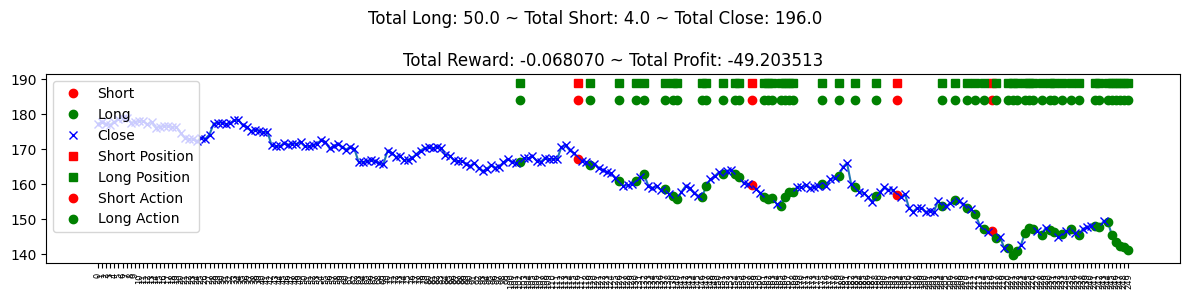

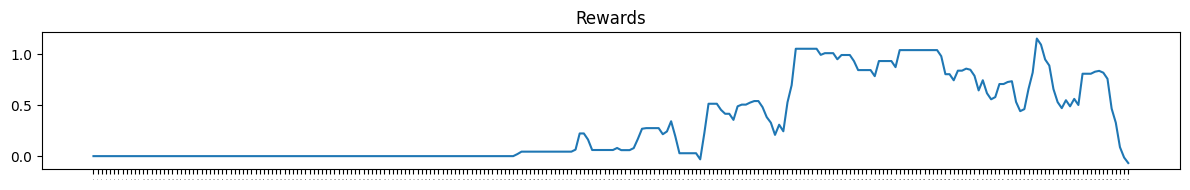

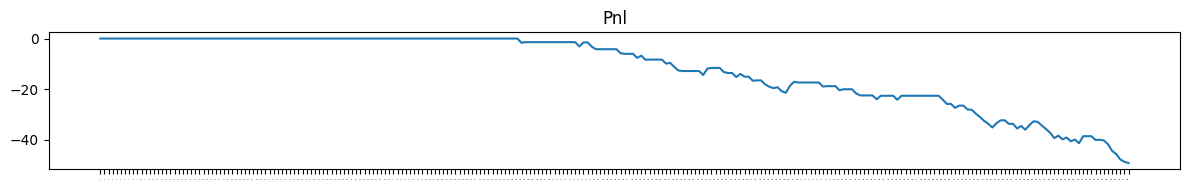

In [6]:
import numpy as np
from sb3_contrib import RecurrentPPO
from stable_baselines3 import A2C, DQN, PPO
from utils.load_data import load_data
from utils.model import create_env, load_model

# df = load_data('../csv_clean_5m/NVDA.csv')
# df = load_data('../csv_clean_5m/AAPL.csv')
df = load_data('../csv_data/AAPL.csv')
# df = load_data('../csv_data/NVDA.csv')
# df = load_data('../csv_data/QCOM.csv')
# df = load_data('../csv_data/ADBE.csv')
# df2 = df.iloc[-100:]
# df = df.iloc[-720:-480]
# df2 = df.iloc[64174:69777]

# df = load_data('../csv_data/AAPL.csv')
# df = load_data('../csv_data/NVDA.csv')
# df2 = df[2018:2709]

# Bullish
# df = df[2400:2709]
# df = df[2588:2689]
# Bearish
df = df.iloc[400:650]

# Small
# df = df.iloc[400:500]
# df = df.iloc[100:500]

# Larger
# df = df.iloc[200:900]
env = create_env(df)

seed = np.random.seed()
# seed = 42
env.reset(seed=seed)

if 'model' in locals():
    del model

# agent_file_name = "last_model"
agent_file_name = "neat_best_model_2"
# agent_file_name = "neat_best_model_6"
model = load_model(f"{agent_file_name}", env=env)
vec_env = model.get_env()
if vec_env is not None:
    total_num_episodes = 1

    for episode in range(total_num_episodes):
        obs = vec_env.reset()

        total_reward = 0
        done = False

        # cell and hidden state of the LSTM
        lstm_states = None
        num_envs = 1
        # Episode start signals are used to reset the lstm states
        episode_starts = np.ones((num_envs,), dtype=bool)
        while not done:
            action, lstm_states = model.predict(
                obs, state=lstm_states, episode_start=episode_starts, deterministic=True)
            obs, rewards, done, info = vec_env.step(action)
            episode_starts = done

            """ action, _states = model.predict(obs)
            # action = [vec_env.action_space.sample()]
            obs, reward, done, info = vec_env.step(action)

            total_reward += reward
            if done:
                break """

        print(
            f"Total reward = {vec_env.buf_infos[-1]['total_reward']} vs Total profit = {vec_env.buf_infos[-1]['total_profit']}")

        vec_env.unwrapped.env_method('render')
vec_env.close()